# Example of Kilosort 4 on SpikeGadgets NP data
Tutorial for running the Kilosort4 for the NP data recorded by the SpikeGadgets system.  
Test data are recorded with 384 channels from MEC of the bat #14662 on 2/07/24 by TY.

## Load test data

SpikeGadgetsRecordingExtractor: 400 channels - 30.0kHz - 1 segments - 253,792 samples - 8.46s 
                                int16 dtype - 193.63 MiB
  file_path: D:\Kilosort4\test\np_15sec.rec
Data type: int16
Sampling rate 30000.0
[Probe - 176ch - 1shanks, Probe - 224ch - 1shanks]


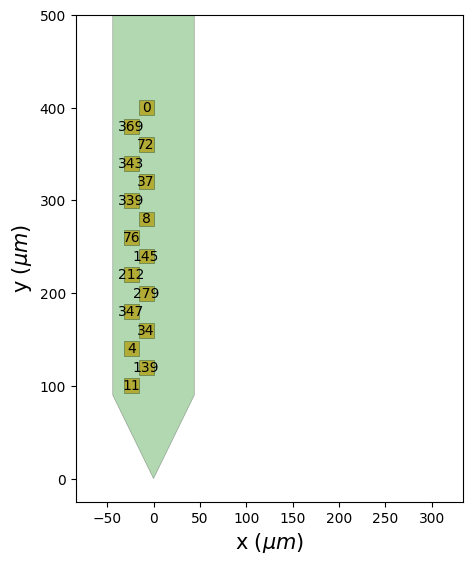

In [28]:
import matplotlib.pyplot as plt
from pprint import pprint

import spikeinterface as si  # import core only
import spikeinterface.extractors as se
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.curation as scur
import spikeinterface.widgets as sw


# Parallel processing
global_job_kwargs = dict(n_jobs=4, chunk_duration="1s")
si.set_global_job_kwargs(**global_job_kwargs)

# Path of test data
rec_path = "D:/Kilosort4/test/np_15sec.rec"

# Load test data
recording = se.read_spikegadgets(rec_path)
print(recording)

print('Data type:', recording.dtype)
print('Sampling rate', recording.sampling_frequency)
# print('Channel ID:',recording.channel_ids)

# Get probes
probes = recording.get_probes()
n_probe = len(probes)
print(probes)

# Get probe information
fig, ax = plt.subplots(figsize=(5, 10))
sw.plot_probe_map(recording, ax=ax, with_channel_ids=True)
ax.set_ylim(-25, 500)
# ax.set_ylim(7000, 7800)
plt.show()

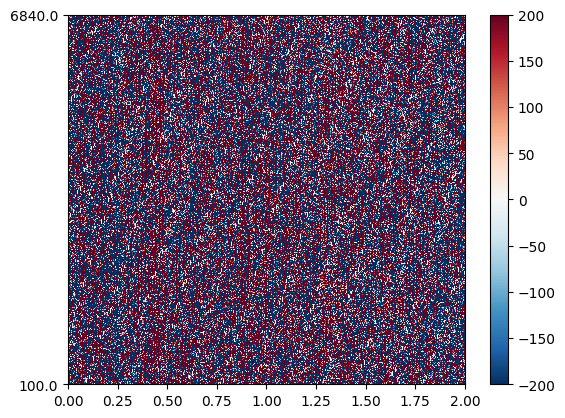

In [12]:
# Example of spike traces
w_ts = sw.plot_traces(recording, time_range=(0, 2))

In [31]:
rec_flt = spre.highpass_filter(recording, freq_min=300.)
bad_channel_ids, channel_labels = spre.detect_bad_channels(rec_flt)
# rec_good = rec_flt.remove_channels(bad_channel_ids)
# print('bad_channel_ids', bad_channel_ids)
rec_good = rec_flt
# rec_ps = spre.phase_shift(rec_good)
rec_ps = rec_good
rec_cr = spre.common_reference(rec_ps, operator="median", reference="global")
rec_processed = rec_cr
rec_processed

CommonReferenceRecording: 400 channels - 30.0kHz - 1 segments - 253,792 samples - 8.46s 
                          int16 dtype - 193.63 MiB